# LoL dataset visualization

## Importing libraries

In [49]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt

from neuralol.constants import Role, StatsCols

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Players game stats

In [2]:
df_players_game_stats = pd.read_csv('../data/raw/game_players_stats.csv')
print(f"{df_players_game_stats.shape[0]} rows and {df_players_game_stats.shape[1]} columns")
display(df_players_game_stats.head(10))
print(df_players_game_stats.columns)

374554 rows and 28 columns


,game_id,player_id,player_name,team_id,team_name,team_acronym,role,win,game_length,champion_name,...,player_assists,total_minions_killed,gold_earned,level,total_damage_dealt,total_damage_dealt_to_champions,total_damage_taken,wards_placed,largest_killing_spree,largest_multi_kill
0,15,0,shanji,0,Legend Esport Gaming,LEG,Top,False,1415,Irelia,...,1,179,8530,12,99007,7923,15326,8,0,1
1,15,1,Demon,1,Bilibili Gaming Junior,BLGJ,Top,True,1415,Vladimir,...,6,174,8565,14,100342,10857,16475,11,2,1
2,15,2,yanxuan,0,Legend Esport Gaming,LEG,Bot,False,1415,Kai'Sa,...,1,227,9613,12,116407,7011,5788,9,0,1
3,15,3,Viod,0,Legend Esport Gaming,LEG,Support,False,1415,Lux,...,2,19,5442,10,23555,4932,6151,25,0,0
4,15,4,HanXuan,1,Bilibili Gaming Junior,BLGJ,Mid,True,1415,Aatrox,...,4,188,10125,14,125022,10749,15481,10,3,2
5,15,5,Yui,1,Bilibili Gaming Junior,BLGJ,Support,True,1415,Alistar,...,11,45,7615,12,27332,2889,8318,25,0,1
6,15,6,Chieftain,1,Bilibili Gaming Junior,BLGJ,Jungle,True,1415,Gragas,...,5,129,9686,13,121081,7263,18191,19,5,1
7,15,7,Virus,1,Bilibili Gaming Junior,BLGJ,Bot,True,1415,Xayah,...,3,249,12122,14,147097,9059,8442,9,3,2
8,15,8,Assassin,0,Legend Esport Gaming,LEG,Mid,False,1415,Akali,...,0,193,9434,13,114025,11373,18390,6,2,1
9,15,9,CatJug,0,Legend Esport Gaming,LEG,Jungle,False,1415,Sejuani,...,4,167,8511,13,128180,5912,16508,6,0,0


Index(['game_id', 'player_id', 'player_name', 'team_id', 'team_name',
       'team_acronym', 'role', 'win', 'game_length', 'champion_name',
       'team_kills', 'tower_kills', 'inhibitor_kills', 'dragon_kills',
       'herald_kills', 'baron_kills', 'player_kills', 'player_deaths',
       'player_assists', 'total_minions_killed', 'gold_earned', 'level',
       'total_damage_dealt', 'total_damage_dealt_to_champions',
       'total_damage_taken', 'wards_placed', 'largest_killing_spree',
       'largest_multi_kill'],
      dtype='object')


In [3]:
print(f"Number of different games: {df_players_game_stats[StatsCols.GAME_ID].nunique()}")
print(f"Number of different players: {df_players_game_stats[StatsCols.PLAYER_ID].nunique()}")
print(f"Number of different teams: {df_players_game_stats[StatsCols.TEAM_ID].nunique()}")
# Check missing values in players_game_stats
print("\nMissing values in players_game_stats:")
missing_values = df_players_game_stats.isna().sum()
print(missing_values[missing_values > 0])  # Only show columns with missing values

# Percentage of missing values
print("\nPercentage of missing values:")
percent_missing = (missing_values / df_players_game_stats.shape[0]) * 100
print(percent_missing[percent_missing > 0])  # Only show columns with missing values

Number of different games: 37459
Number of different players: 4953
Number of different teams: 844

Missing values in players_game_stats:
team_acronym    290
dtype: int64

Percentage of missing values:
team_acronym    0.077425
dtype: float64


### Game stats visualization

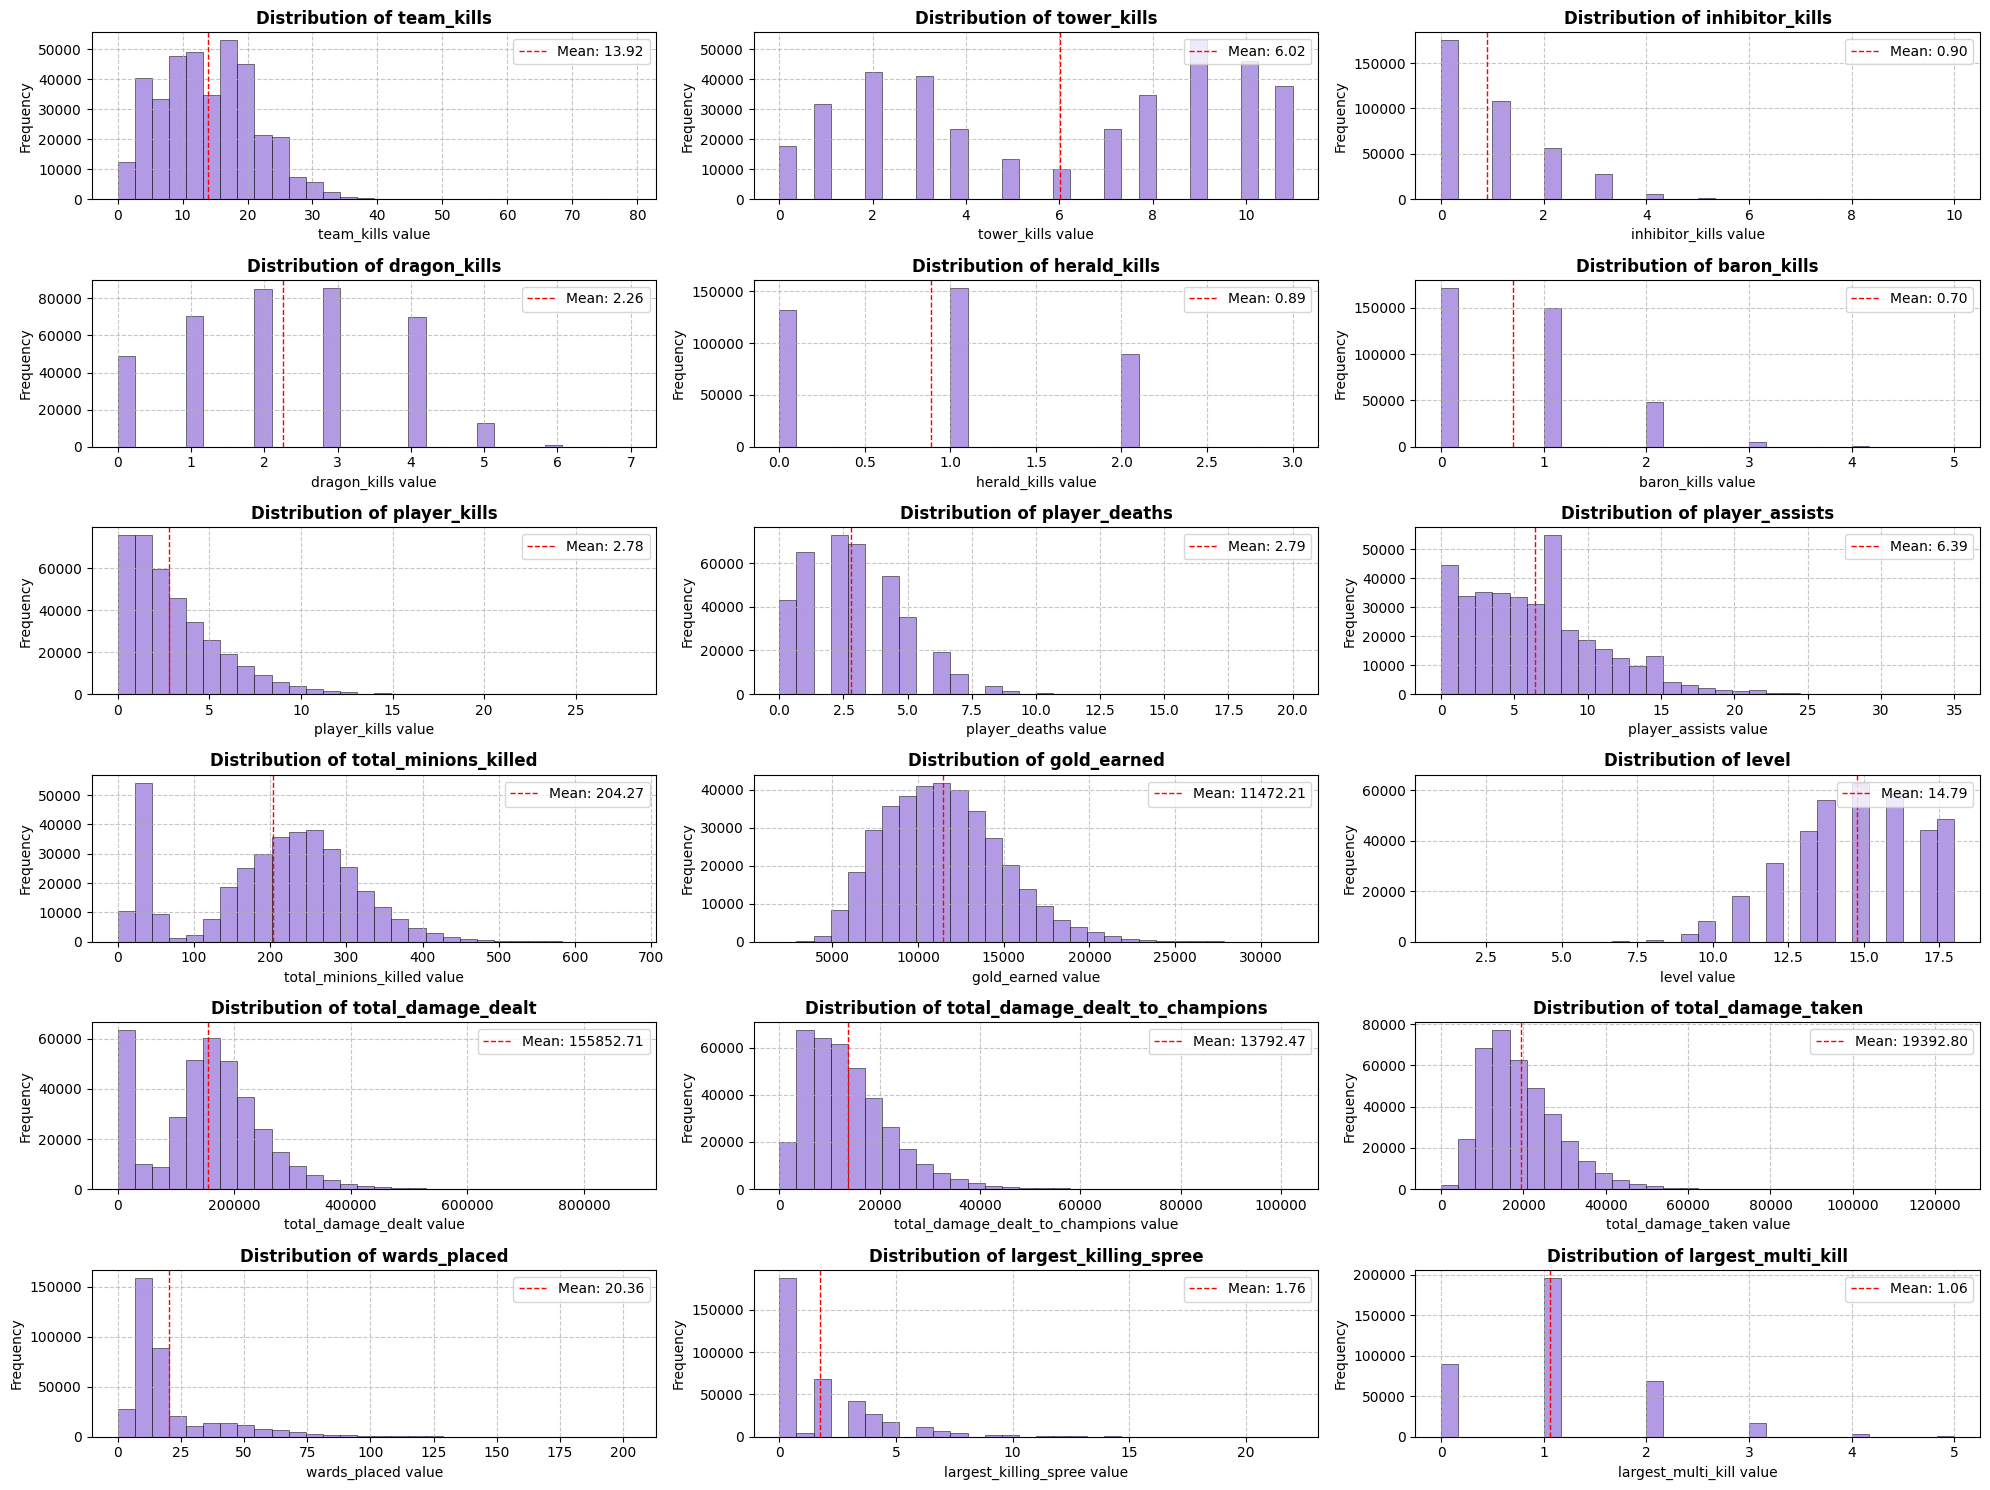

In [66]:
numeric_players_game_stats = df_players_game_stats.select_dtypes(include=['float64', 'int64']).drop(
    columns=[StatsCols.GAME_ID, StatsCols.PLAYER_ID, StatsCols.TEAM_ID, StatsCols.GAME_LENGTH])
# Calculate means for all numeric columns
column_means = numeric_players_game_stats.mean()

# Set up a grid of subplots
n_columns = len(numeric_players_game_stats.columns)
n_cols = 3  # Number of columns in the grid
n_rows = (n_columns + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create the figure with proper size
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 2.5))
axes = axes.flatten()  # Flatten the axes array for easier indexing

# Create a histogram for each numeric column
for i, column in enumerate(numeric_players_game_stats.columns):
    ax = axes[i]
    data = numeric_players_game_stats[column]
    
    # Create histogram
    ax.hist(data, bins=30, alpha=0.7, color="mediumpurple", edgecolor="black", linewidth=0.5)
    
    # Add a vertical line for the mean
    mean_value = column_means[column]
    ax.axvline(mean_value, color="red", linestyle="dashed", linewidth=1, label=f"Mean: {mean_value:.2f}")
    
    # Set labels and title
    ax.set_xlabel(f"{column} value")
    ax.set_ylabel("Frequency")
    ax.set_title(f"Distribution of {column}", fontweight="bold")
    ax.legend(loc='upper right', framealpha=0.8)
    
    # Add grid lines
    ax.grid(True, linestyle="--", alpha=0.7)

# Hide any unused subplots
for i in range(n_columns, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

### Games played by player

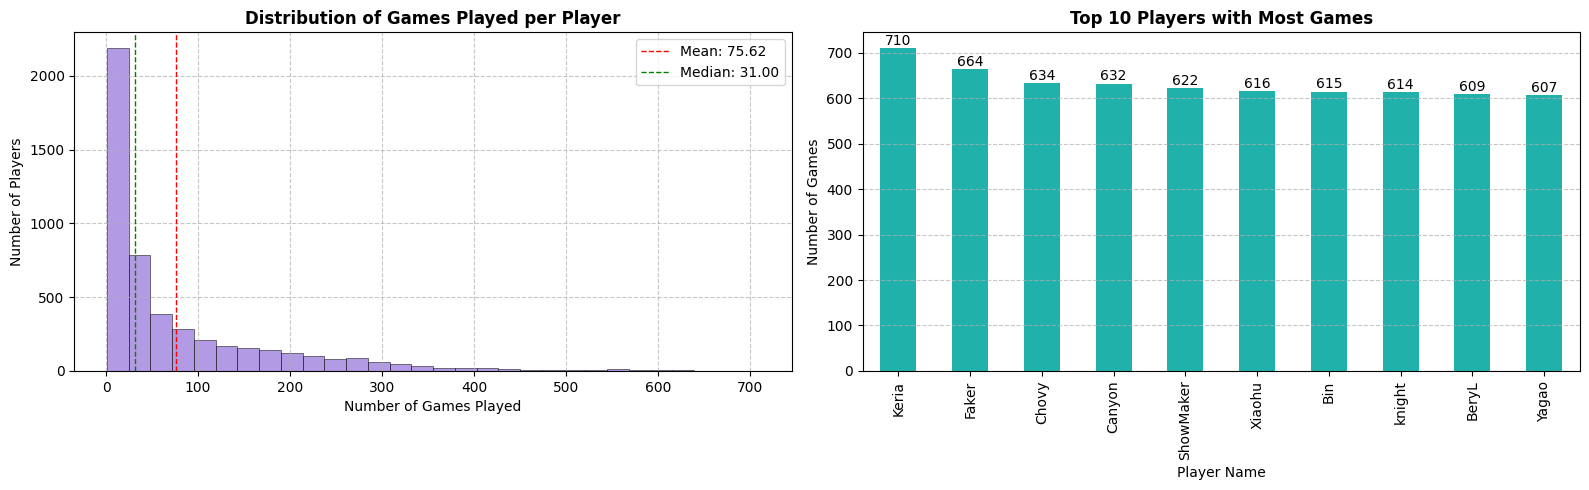

In [65]:
# Count the number of games played by each player
games_per_player = df_players_game_stats.groupby(StatsCols.PLAYER_ID)[StatsCols.GAME_ID].nunique()

# Create a figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
# Plot histogram of games per player
axes[0].hist(games_per_player, bins=30, color='mediumpurple', edgecolor='black', alpha=0.7, linewidth=0.5)
axes[0].set_xlabel('Number of Games Played')
axes[0].set_ylabel('Number of Players')
axes[0].set_title('Distribution of Games Played per Player', fontweight='bold')
axes[0].grid(True, linestyle='--', alpha=0.7)
# Add some statistics to the histogram
mean_games = games_per_player.mean()
median_games = games_per_player.median()
axes[0].axvline(mean_games, color='red', linestyle='dashed', linewidth=1, label=f"Mean: {mean_games:.2f}")
axes[0].axvline(median_games, color='green', linestyle='dashed', linewidth=1, label=f"Median: {median_games:.2f}")
axes[0].legend(loc='upper right', framealpha=0.8)

# Get the top 10 players with most games
top_players = games_per_player.nlargest(10)
# Map player names to player IDs
player_name_mapping = df_players_game_stats[[StatsCols.PLAYER_ID, StatsCols.PLAYER_NAME]].drop_duplicates().set_index(StatsCols.PLAYER_ID)[StatsCols.PLAYER_NAME]
# Create numbers of games played Series with player names as index
top_players_with_names = pd.Series(top_players.values, index=[player_name_mapping[player_id] for player_id in top_players.index])

# Plot bar chart for top 5 players
bars = top_players_with_names.plot(kind='bar', ax=axes[1], color='lightseagreen')
axes[1].set_xlabel('Player Name')
axes[1].set_ylabel('Number of Games')
axes[1].set_title('Top 10 Players with Most Games', fontweight='bold')
axes[1].grid(True, linestyle='--', alpha=0.7, axis='y')

# Add the values on top of the bars
for i, v in enumerate(top_players_with_names):
    axes[1].text(i, v + 1, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Most played champions

Number of different champions played: 168


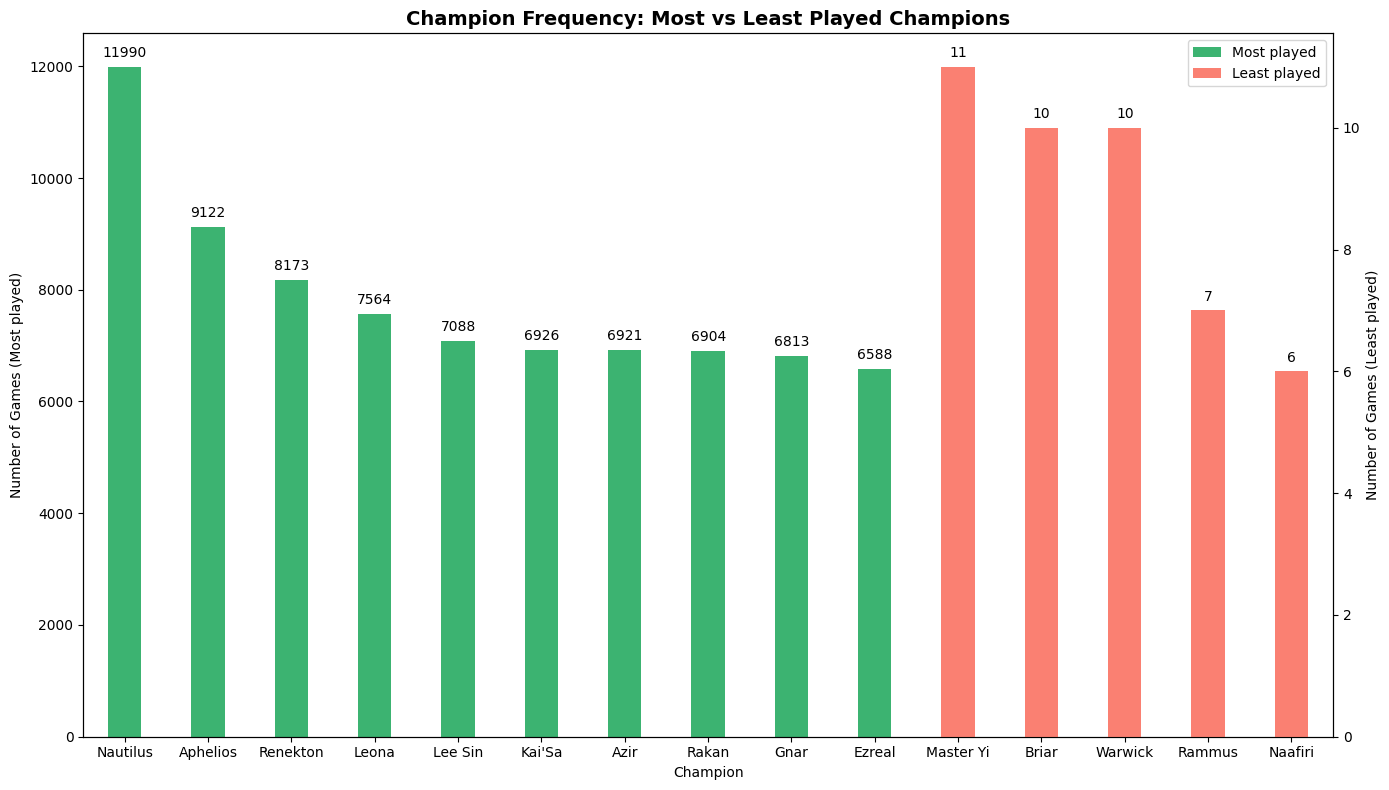

In [63]:
# Count the number of games played per champion
champion_counts = df_players_game_stats['champion_name'].value_counts()
print(f"Number of different champions played: {len(champion_counts.values)}")

# Get top 10 and bottom 5 champions by games played
top_10_champions = champion_counts.nlargest(10).sort_values(ascending=False)
bottom_5_champions = champion_counts.nsmallest(5).sort_values(ascending=False)

# Create figure for top 10 and bottom 5 champions
fig, ax = plt.subplots(figsize=(14, 8))

# Plot top 10 champions manually
x_top = range(len(top_10_champions))
ax.bar(x_top, list(top_10_champions.values), color='mediumseagreen', width=0.4, label='Most played')
# Add count values on top of bars for top 10
for i, v in enumerate(top_10_champions):
    ax.text(i, v + (top_10_champions.max() * 0.01), str(v), ha='center', va='bottom')

# Plot bottom 5 champions after the top 10
ax2 = ax.twinx()  # Create a second y-axis sharing the same x-axis
x_bottom = range(len(top_10_champions), len(top_10_champions) + len(bottom_5_champions))
ax2.bar(x_bottom, list(bottom_5_champions.values), color='salmon', width=0.4, label='Least played')
# Add count values on top of bars for bottom 5
for i, v in enumerate(bottom_5_champions):
    ax2.text(i + len(top_10_champions), v + (bottom_5_champions.max() * 0.01), str(v), ha='center', va='bottom')

# Adjust x-axis limits to show all bars & x-ticks to show all champion names
plt.xlim(-0.5, len(top_10_champions) + len(bottom_5_champions) - 0.5)
all_champions = list(top_10_champions.index) + list(bottom_5_champions.index)
plt.xticks(range(len(all_champions)), all_champions, ha='right')

# Set titles and labels
ax.set_title('Champion Frequency: Most vs Least Played Champions', fontsize=14, fontweight='bold')
ax.set_xlabel('Champion')
ax.set_ylabel('Number of Games (Most played)')
ax2.set_ylabel('Number of Games (Least played)')
# Add legends
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines1 + lines2, labels1 + labels2, loc='best')

plt.tight_layout()
plt.show()

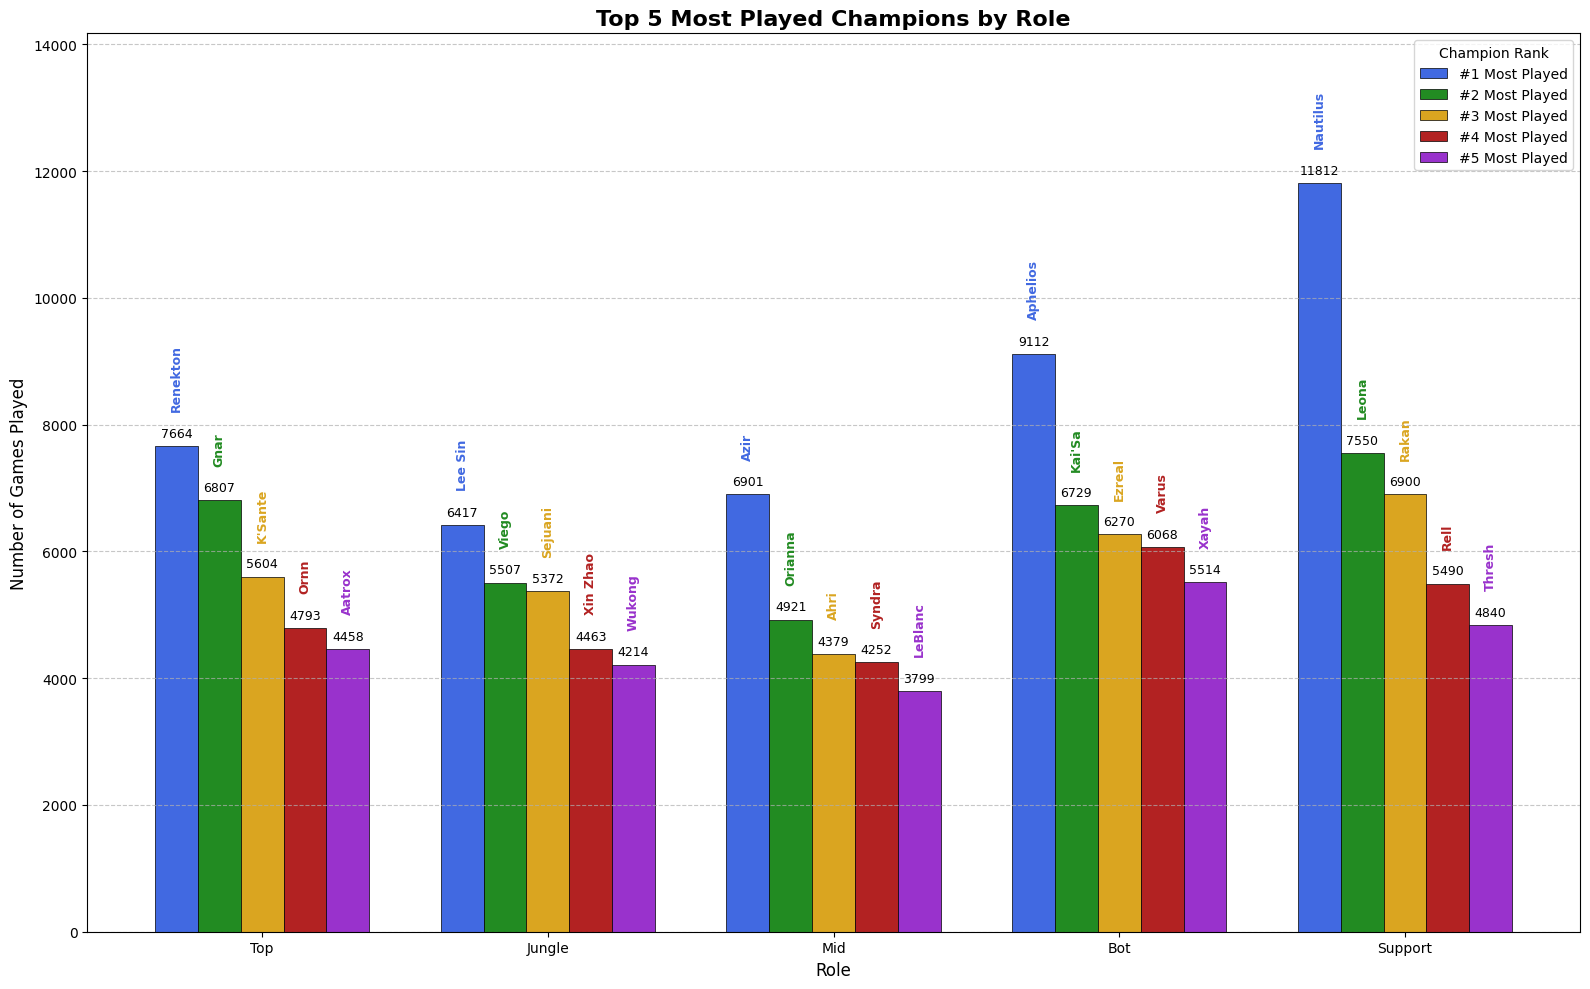

In [68]:
unique_roles = [Role.TOP, Role.JUNGLE, Role.MID, Role.BOT, Role.SUPPORT]

# Create a figure
fig, ax = plt.subplots(figsize=(16, 10))

# Define colors for champion ranks
rank_colors = {
    1: 'royalblue',
    2: 'forestgreen', 
    3: 'goldenrod',
    4: 'firebrick',
    5: 'darkorchid'
}

bar_width = 0.15 # Set the width of the bars
num_ranks = 5  # Shows top 5 champions for each role

# For each role, we'll have one group with bars for each champion rank (1st to 5th most played)
x = np.arange(len(unique_roles))  # Positions for role groups

champ_names = {} # Store champion names for each role
max_y_val = 0 # Variable to keep track of the maximum y-value for proper scaling

# Plot bars for each champion rank
for i in range(1, num_ranks + 1):  # 1 to 5
    rank_data = [] # Store the number of games played for a rank of each role
    for role in unique_roles:
        role_data = df_players_game_stats[df_players_game_stats[StatsCols.ROLE] == role] # Keep only rows for this role
        top_champs = role_data[StatsCols.CHAMPION_NAME].value_counts().nlargest(num_ranks) # Get top 5 champions for this role
        
        # Store top 5 champion names if this is the first iteration
        if i == 1:
            champ_names[role] = list(top_champs.index)
        
        rank_data.append(top_champs.values[i-1])
    
    # Calculate positions for this rank's bars
    positions = x + (i - num_ranks/2 - 0.5) * bar_width
    
    # Plot bars
    bars = ax.bar(positions, rank_data, width=bar_width, color=rank_colors[i],
                 label=f'#{i} Most Played', edgecolor='black', linewidth=0.5)
    
    # Add values and champion names on top of bars
    for j, val in enumerate(rank_data):
        # Add value text
        ax.text(positions[j], val + 100, str(val), ha='center', va='bottom', fontsize=9)
        
        # Add champion name
        role = unique_roles[j]
        champ_name = champ_names[role][i-1]
        ax.annotate(champ_name, 
                  xy=(positions[j], val),
                  xytext=(0, 25),
                  textcoords="offset points", 
                  ha='center', va='bottom',
                  fontsize=9, rotation=90,
                  color=rank_colors[i],
                  fontweight='bold')
    
    # Keep the maximum y-value for scaling
    max_y_val = max(max_y_val, max(rank_data))

# Set x-axis labels
ax.set_xticks(x)
ax.set_xticklabels(unique_roles)
# Set y-axis limit with enough room for annotations
ax.set_ylim(0, max_y_val * 1.2)

# Customize plot
ax.set_xlabel('Role', fontsize=12)
ax.set_ylabel('Number of Games Played', fontsize=12)
ax.set_title(f'Top {num_ranks} Most Played Champions by Role', fontsize=16, fontweight='bold')
ax.grid(True, linestyle='--', alpha=0.7, axis='y')
ax.legend(title='Champion Rank', loc='upper right')

plt.tight_layout()
plt.show()

### Game metadata

In [5]:
game_metadata = pd.read_csv('../data/raw/game_metadata.csv')
print(f"{game_metadata.shape[0]} rows and {game_metadata.shape[1]} columns")
display(game_metadata.head(10))

37459 rows and 9 columns


,game_id,date,match_id,tournament_id,tournament_name,series_id,series_name,league_id,league_name
0,0,2019-09-15 10:17:30.487000,0,0,Playoffs,0,VCS Summer 2019,0,VCS
1,1,2019-09-15 11:18:01.085000,0,0,Playoffs,0,VCS Summer 2019,0,VCS
2,2,2019-09-15 12:11:33.489000,0,0,Playoffs,0,VCS Summer 2019,0,VCS
3,3,2019-09-15 13:03:19.662000,0,0,Playoffs,0,VCS Summer 2019,0,VCS
4,4,2019-09-16 04:32:28.724000,1,1,Playoffs,1,LJL Summer 2019,1,LJL
5,5,2019-09-16 05:29:41.680000,1,1,Playoffs,1,LJL Summer 2019,1,LJL
6,6,2019-09-16 06:45:07.195000,1,1,Playoffs,1,LJL Summer 2019,1,LJL
7,7,2019-09-16 07:45:59.496000,1,1,Playoffs,1,LJL Summer 2019,1,LJL
8,8,2019-09-15 15:08:08.817000,2,2,Regional Finals,2,LEC Summer 2019,2,LEC
9,9,2019-09-15 16:03:21.799000,2,2,Regional Finals,2,LEC Summer 2019,2,LEC


### Game events

In [6]:
df_game_events = pd.read_csv('../data/raw/game_events.csv')
print(f"{df_game_events.shape[0]} rows and {df_game_events.shape[1]} columns")
display(df_game_events.head(10))

1884740 rows and 8 columns


,id,game_id,timestamp,event_type,killer_id,killed_id,assisting_player_ids,drake_type
0,0,0,229,player_kill,21.0,29.0,[23],NaN
1,1,0,289,player_kill,21.0,29.0,[23],NaN
2,2,0,499,player_kill,25.0,21.0,"[29, 22]",NaN
3,3,0,504,player_kill,22.0,23.0,"[29, 25]",NaN
4,4,0,535,player_kill,28.0,24.0,[27],NaN
5,5,0,698,player_kill,28.0,24.0,"[21, 23, 30, 27]",NaN
6,6,0,700,player_kill,23.0,26.0,"[30, 28, 27]",NaN
7,7,0,705,player_kill,27.0,25.0,"[21, 30]",NaN
8,8,0,819,player_kill,28.0,24.0,[27],NaN
9,9,0,823,player_kill,22.0,28.0,[24],NaN
